In [1]:
#1,	Load data	To start working with the real dataset
import pandas as pd

df=pd.read_csv("en.openfoodfacts.org.products.tsv/en.openfoodfacts.org.products.tsv",sep='\t', low_memory=False)
df.shape

(356027, 163)

Main Motive / Objective:
To analyze and understand patterns in global packaged food products using the Open Food Facts dataset, with a focus on:

✅ Common brands
✅ Countries with the most products
✅ Nutrition levels (sugar, fat, salt)
✅ Healthiest and unhealthiest products
✅ General trends in food product quality

✅ Why This Project?

  Because food data is:

📊 Real-world and messy — perfect to practice cleaning + analysis

🧪 Rich in features — allows you to apply multiple pandas techniques

💡 Meaningful — you can find insights that actually relate to daily life (like how sugary or salty common foods are)



| Step | Action                     | Why We Do It                               |
| ---- | -------------------------- | ------------------------------------------ |
| 1    | Load data                  | To start working with the real dataset     |
| 2    | Keep specific columns      | To focus on relevant information only      |
| 3    | Clean missing/invalid data | So that our analysis is accurate           |
| 4    | Find top countries         | To see where most products come from       |
| 5    | Find popular brands        | To understand brand dominance              |
| 6    | Analyze fat/sugar/salt     | To explore nutritional patterns            |
| 7    | Use NutriScore             | To identify healthy and unhealthy products |
| 8    | (Optional) Save results    | To reuse or share cleaned data             |
| 9    | (Optional) Visualize sugar | To show patterns more clearly              |


In [2]:
 #This step selects only the useful columns from the entire dataset.
#Make the dataset smaller, cleaner, and focused on nutrition + branding + geography
columns = ['product_name', 'brands', 'countries', 'nutrition-score-fr_100g',
           'energy_100g', 'fat_100g', 'sugars_100g', 'salt_100g']
df = df[columns]    #"Keep only these 8 columns in the dataframe."
df.columns.tolist()

['product_name',
 'brands',
 'countries',
 'nutrition-score-fr_100g',
 'energy_100g',
 'fat_100g',
 'sugars_100g',
 'salt_100g']

In [3]:
#3   Clean missing/invalid data :- So that our analysis is accurate   
# Drop rows where these important columns are missing (delete)
df = df.dropna(subset=['product_name', 'brands', 'countries'])  #

# Reset index to keep things clean
#After dropping rows, the index might look like: 0, 1, 5, 7, 10...
#This line resets the index to be clean and sequential: 0, 1, 2, 3...
df.reset_index(drop=True, inplace=True)

# View summary info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324479 entries, 0 to 324478
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             324479 non-null  object 
 1   brands                   324479 non-null  object 
 2   countries                324479 non-null  object 
 3   nutrition-score-fr_100g  249274 non-null  float64
 4   energy_100g              288505 non-null  float64
 5   fat_100g                 272665 non-null  float64
 6   sugars_100g              273007 non-null  float64
 7   salt_100g                283609 non-null  float64
dtypes: float64(5), object(3)
memory usage: 19.8+ MB


In [4]:
#Step 4: Find the Top Countries by Product Count.
'''To find out which countries have the most food products listed in the dataset.
This gives us insight into where most packaged food items come from.'''
df.countries.value_counts().head(10)
df.brands

0         Ferme t'y R'nao
1          Torn & Glasser
2               Grizzlies
3          Bob's Red Mill
4                    Unfi
               ...       
324474       Trader Joe's
324475                 乐吧
324476       Leader Price
324477              Knorr
324478      Market Pantry
Name: brands, Length: 324479, dtype: object

In [5]:
#Step 5: Top Brands in the Dataset
#To find the most frequently occurring brands in the dataset, regardless of country.
'''Why This Matters:
- Helps identify which brands dominate the market
- Real-world applications: trend analysis, competitor research, marketing focus'''

# Handle multiple brands per row (split by comma), clean spaces
brand_series = df['brands'].str.split(',').explode().str.strip()

# Show top 10 brands
brand_series.value_counts().head(10)

brands
Carrefour            4590
Auchan               3891
U                    2913
Meijer               2574
//Propiedad de://    2562
Marque Repère        2441
Casino               2353
Leader Price         2185
Kroger               1989
Nestlé               1616
Name: count, dtype: int64

In [6]:
#Step 6: Sugar and Fat Content Analysis
'''
To calculate the average amount of sugar and fat per 100g of food product.
This gives insight into how healthy or unhealthy the general product pool is.

'''
# Calculate and display average sugar and fat content
avg_sugar = df['sugars_100g'].mean()
avg_fat = df['fat_100g'].mean()

print(f"Average Sugar: {avg_sugar:.2f}g per 100g")
print(f"Average Fat: {avg_fat:.2f}g per 100g")


Average Sugar: 15.67g per 100g
Average Fat: 12.78g per 100g


In [7]:
# Sort by nutrition score (lower = healthier)
# Drop NA values just for safety
nutri_df = df[['product_name', 'brands', 'nutrition-score-fr_100g']].dropna()

# Healthiest 5 products
print("🥦 Healthiest Products:")
print(nutri_df.sort_values(by='nutrition-score-fr_100g').head())

# Unhealthiest 5 products
print("\n🍩 Unhealthiest Products:")
print(nutri_df.sort_values(by='nutrition-score-fr_100g', ascending=False).head())


🥦 Healthiest Products:
                product_name     brands  nutrition-score-fr_100g
234505          Pois chiches    Primeal                    -15.0
315459               Edamame  Sin marca                    -14.0
221213          Fèves pelées     Picard                    -14.0
287614  Edamamé Beans Nature       Lima                    -14.0
211434  Lentilles corail bio    U Bio,U                    -14.0

🍩 Unhealthiest Products:
                                 product_name    brands  \
184014           Granulowany napój herbaciany  Cynxshno   
55165                   Coffee & Milk Creamer   Tassimo   
55140   Cafe Collection Coffee & Milk Creamer   Tassimo   
55139         Maxwell House, Creme Cappuccino   Tassimo   
55248     Tim Hortons, Cafe & Bake Shop Latte   Tassimo   

        nutrition-score-fr_100g  
184014                     40.0  
55165                      40.0  
55140                      40.0  
55139                      40.0  
55248                      38.0  


In [8]:
# Save cleaned dataset to a CSV file (without index numbers)
df.to_excel("cleaned_food_data.xlsx", index=False)


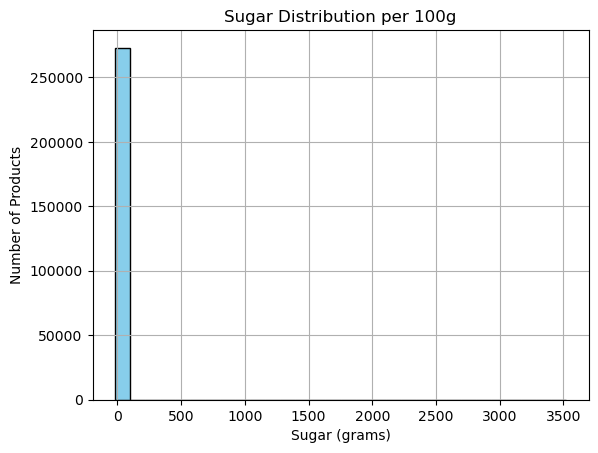

In [9]:
#To visualize how much sugar (per 100g) is typically present in the food products using a histogram.
import matplotlib.pyplot as plt

# Drop missing values in sugar column for clean plotting
df['sugars_100g'].dropna().hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Sugar Distribution per 100g")
plt.xlabel("Sugar (grams)")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()

